In [ ]:
#Trend 1: Overall Urban city types take up the majority of the "Pyber" market; having the most drivers, highest number of rides, and generates the the greatest percentage of fares. 
#Trend 2: The Rural and Suburban city types have a tendency to generate higher average fares than Urban cities.
#Trend 3: While the Rural and Suburban cities have a pretty wide range of average fares, genarally above $25, Urban cities average fares never go above $30 for this data set.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_data = ride_data_to_load.merge(city_data_to_load, how='right', on='city')

# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# get mean fare and ride count
mean_fare = merged_data.groupby('city')['fare'].mean()
ride_count = merged_data.groupby('city')['ride_id'].count()

# input to new df
d = {"Mean Fare": mean_fare, "Ride Count": ride_count}
df = pd.DataFrame(data=d)

# build new df for bubble chart data

#isolate city, driver count, and city type in df
city_driver_type_df = merged_data.drop(columns=['date', 'fare', 'ride_id'])
city_driver_type_df = city_driver_type_df.drop_duplicates(subset=None, keep='first', inplace=False)

# merged df's 
df = df.merge(city_driver_type_df, how='right', on='city')

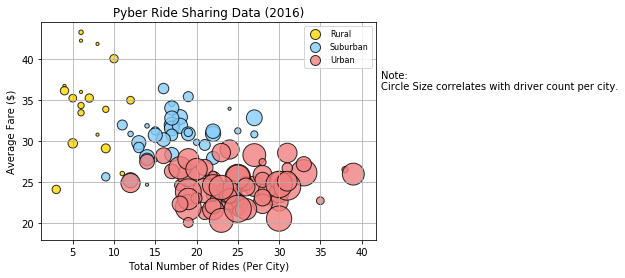

In [4]:
# Create separate df's for city types
rural_df = df[df.type == 'Rural']
suburban_df = df[df.type == 'Suburban']
urban_df = df[df.type == 'Urban']

# Build the scatter plots for each city types
fig, ax = plt.subplots()
colors = ['gold', 'lightskyblue', 'lightcoral']

rural = ax.scatter(rural_df['Ride Count'], rural_df['Mean Fare'],  s=rural_df['driver_count']*10, 
           c=colors[0], alpha=0.8, linewidth=1, 
           edgecolors="black")
suburban = ax.scatter(suburban_df['Ride Count'], suburban_df['Mean Fare'],  s=suburban_df['driver_count']*10, 
           c=colors[1], alpha=0.8, linewidth=1, 
           edgecolors="black")
urban = ax.scatter(urban_df['Ride Count'], urban_df['Mean Fare'],  s=urban_df['driver_count']*10, 
           c=colors[2], alpha=0.8, linewidth=1, 
           edgecolors="black")


# Incorporate the other graph properties

# Titles
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Add grid
plt.grid()

# Create a legend
lgnd = plt.legend((rural, suburban, urban),
           ('Rural', 'Suburban', 'Urban'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

# Set marker size for legend
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

# Incorporate a text label regarding circle size
plt.annotate('Note:\nCircle Size correlates with driver count per city.', (0,0), (340, 170), xycoords='axes fraction', textcoords='offset points', va='top')

# Save Figure
plt.savefig("PyberBubbleChart.png")

# Show Plot
plt.show()

## Total Fares by City Type

In [5]:
# Calculate Type Percents
type_total_fare = merged_data.groupby('type')['fare'].sum()
total_fare = type_total_fare.sum()
percent_fare = (type_total_fare / total_fare)*100

# input to new df
d2 = {"Percent Fare": percent_fare}
df2 = pd.DataFrame(data=d2)

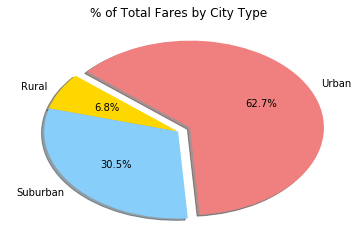

In [6]:
# Build Pie Chart

# The colors of each section of the pie chart
colors = ['gold', 'lightskyblue', 'lightcoral']

# set labels
labels = ['Rural', 'Suburban', 'Urban']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# plot chart
plt.pie(df2['Percent Fare'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("PercentTotalFare.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [7]:
# Calculate Ride Percents
type_total_ride = merged_data.groupby('type')['ride_id'].count()
total_ride = type_total_ride.sum()
percent_ride = (type_total_ride / total_ride)*100

# input to new df
d3 = {"Percent Ride": percent_ride}
df3 = pd.DataFrame(data=d3)

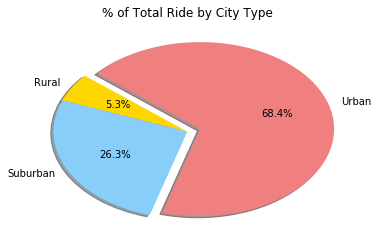

In [8]:
# Build Pie Chart
# using color, label, and explode keys from first pie chart

plt.pie(df3['Percent Ride'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title 
plt.title("% of Total Ride by City Type")

# Save Figure
plt.savefig("PercentTotalRides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [9]:
# Calculate Driver Percents
city_driver_total = df.groupby('type')['driver_count'].sum()
total_driver = city_driver_total.sum()
percent_driver = (city_driver_total / total_driver)*100

# input to new df
d4 = {"Percent Driver": percent_driver}
df4 = pd.DataFrame(data=d4)

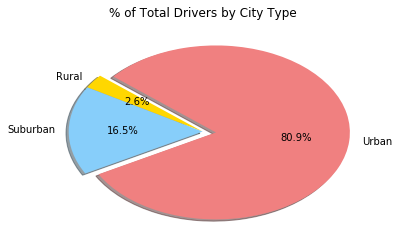

In [10]:
# Build Pie Charts
# using color, label, and explode keys from first pie chart
plt.pie(df4['Percent Driver'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# add title
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("PercentTotalDrivers.png")

# Show Figure
plt.show()